In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [12]:
def distp(X, C):
    C = np.atleast_2d(C)
    X = np.atleast_2d(X) #przy obliczaniu jakości grupowania występował błąd o tym, że argument funkcji jest jednowymiarowy
    dist = np.sqrt(np.sum((C - X)**2, axis=1))
    return dist

def distm(X, C, V):
    Cm = np.mean(X) - C
    inv = np.linalg.inv(V)
    left = np.dot(Cm, inv)
    mahal = np.dot(left, Cm.T)
    return mahal

def ksrodki(X, k, max_iters=100):
    #wektory macierzy C inicjowane losowo
    C = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), size=(k, X.shape[1]))
    CX = np.zeros((X.shape[0], k))
    for _ in range(max_iters):
        for i in range(X.shape[0]):
            dist = distp(X[i], C)
            id = np.argmin(dist)
            CX[i, id] = 1 #przydzielenie wartości 1 dla wektora danych, którego odległość jest najmniejsza

        print('F(C), euclidesowa =', jakosc_grupowania(C)[0]) #obliczanie jakości grupowania
        print('F(C), Mahalanobisa =', jakosc_grupowania_m(C, X)) #obliczanie jakości grupowania
        prev_C = C.copy() #kopia do porównania grupowania
        for i in range(k):
            if np.sum(CX[:, i]) > 0:
                C[i] = np.sum(X* CX[:, i].reshape(-1, 1), axis=0) / np.sum(CX[:, i]) #aktualizacja macierzy środków
        if np.allclose(C, prev_C): #sprawdzenie, czy grupowanie się ustabilizowało
            break
    return C, CX

def jakosc_grupowania(C):
    k = C.shape[0]
    licznik = 0
    mianownik = 0
    for i in range(k-1):
        for x in C:
            licznik += distp(C[i], C[i+1])
    for i in range(k):
        for x in C:
            mianownik += (distp(x, C[i])**2)
    return licznik / mianownik

def jakosc_grupowania_m(C, X):
    k = C.shape[0]
    licznik = 0
    mianownik = 0
    for i in range(k-1):
        for x in C:
            licznik += distm(C[i], C[i+1], np.cov(X.T))
    for i in range(k):
        for x in C:
            mianownik += (distm(x, C[i], np.cov(X.T))**2)
    return licznik / mianownik

F(C), euclidesowa = 0.03110897438648396
F(C), Mahalanobisa = 0.0011884259222029992
F(C), euclidesowa = 0.02827165270820469
F(C), Mahalanobisa = 0.0019085409587065235
F(C), euclidesowa = 0.032977583638227906
F(C), Mahalanobisa = 0.0019171379466456197


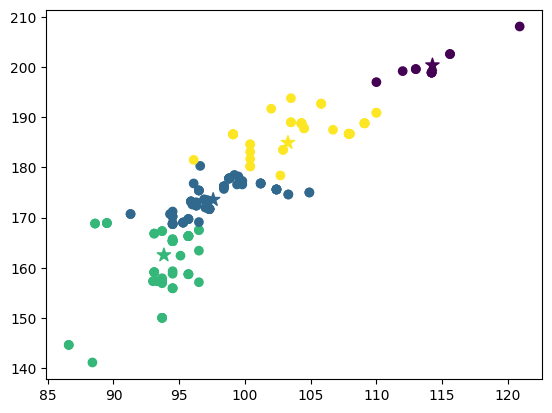

In [16]:
X = np.array(pd.read_csv('autos.csv')[['wheel-base', 'length']])
C, CX = ksrodki(X, 4)
col = np.argmax(CX, axis=1)
plt.scatter(X[:, 0], X[:, 1], c=col)
plt.scatter(C[:, 0], C[:, 1], c=range(len(C)), marker='*', s=100)
plt.show()